In [ ]:
# Data Analytics II
# 1. Implement logistic regression using Python/R to perform classification on
# Social_Network_Ads.csv dataset.
# 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
# on the given dataset.

In [ ]:

# * **True Positive (TP)**: The number of instances that were correctly classified as positive.

# * **False Positive (FP)**: The number of instances that were incorrectly classified as positive (i.e., predicted positive, but actually negative).

# * **True Negative (TN)**: The number of instances that were correctly classified as negative.

# * **False Negative (FN)**: The number of instances that were incorrectly classified as negative (i.e., predicted negative, but actually positive).

# Based on these values, we can calculate the following metrics:

# 1. **Accuracy**: The proportion of correct predictions (both positive and negative) over the total number of predictions.

#    $$
#    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
#    $$

# 2. **Error Rate**: The proportion of incorrect predictions over the total predictions.

#    $$
#    \text{Error Rate} = \frac{FP + FN}{TP + TN + FP + FN}
#    $$

# 3. **Precision**: The proportion of predicted positive instances that are actually positive.

#    $$
#    \text{Precision} = \frac{TP}{TP + FP}
#    $$

# 4. **Recall (Sensitivity)**: The proportion of actual positive instances that are correctly predicted as positive.

#    $$
#    \text{Recall} = \frac{TP}{TP + FN}
#    $$




In [ ]:
# ### What is Logistic Regression?

# **Logistic Regression** is a statistical method used for binary classification problems. Unlike linear regression, which predicts continuous values, logistic regression is used to predict the probability of a binary outcome (0 or 1, True or False, Yes or No). It is widely used in machine learning for tasks where the goal is to classify data into one of two categories.

# ### Key Concepts:

# 1. **Sigmoid Function**:
#    The core idea of logistic regression is that the output of a linear regression model is transformed using the **sigmoid function** (also called the logistic function) to produce probabilities. The sigmoid function squashes the output between 0 and 1, which can then be interpreted as a probability.

#    The sigmoid function is defined as:

#    $$
#    \sigma(z) = \frac{1}{1 + e^{-z}}
#    $$

#    Where:

#    * $z$ is the linear combination of the input features ($z = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$)
#    * $e$ is Euler's number (approximately 2.718)
#    * $w_1, w_2, ..., w_n$ are the weights (coefficients) learned by the model
#    * $b$ is the bias term

#    The output $\sigma(z)$ represents the probability of the instance belonging to the positive class (usually labeled as 1).

# 2. **Log-Odds**:
#    Logistic regression models the **log-odds** of the probability as a linear function of the input features. The log-odds is the logarithm of the ratio of the probability of the positive class to the probability of the negative class.

#    The equation for logistic regression looks like this:

#    $$
#    \text{log-odds} = \log \left( \frac{P(\text{class}=1)}{1 - P(\text{class}=1)} \right)
#    $$

#    The model then predicts the probability using the sigmoid function.

# 3. **Decision Threshold**:
#    After obtaining the probability $P(\text{class}=1)$, a threshold (usually 0.5) is applied to classify the data. If the probability is greater than or equal to 0.5, the predicted class is 1 (positive), otherwise, it is 0 (negative).

#    $$
#    \hat{y} = 
#    \begin{cases}
#    1, & \text{if } P(\text{class}=1) \geq 0.5 \\
#    0, & \text{if } P(\text{class}=1) < 0.5
#    \end{cases}
#    $$

# ### How Does Logistic Regression Work?

# 1. **Training the Model**:
#    During training, the logistic regression model finds the best set of weights ($w$) and bias ($b$) to minimize the **log loss** (also known as binary cross-entropy). This is done using optimization techniques like gradient descent.

# 2. **Log Loss**:
#    The log loss function measures the difference between the predicted probabilities and the actual labels. The objective is to minimize the log loss function to improve the model’s accuracy.

# 3. **Prediction**:
#    After training, the model can predict the probability that a given instance belongs to the positive class (1). This probability is then compared to the decision threshold (0.5) to classify the instance.

# ### Example:

# Imagine you're using logistic regression to predict whether a customer will buy a product based on their age and salary. The output of the logistic regression model would be a probability (say 0.8), meaning there is an 80% chance that the customer will buy the product. If this probability is greater than 0.5, the model will classify the customer as "buying the product" (1); otherwise, it will classify them as "not buying" (0).

# ### Summary:

# * **Logistic regression** is used for **binary classification** problems.
# * It predicts the **probability** that an instance belongs to a particular class (0 or 1).
# * The model uses the **sigmoid function** to convert a linear equation into a probability value.
# * The output of logistic regression is between 0 and 1, which represents the likelihood of a certain event happening.


In [133]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')  # Replace with your dataset path
df["Gender"] = df["Gender"].replace({"Male": 0, "Female":1})

C:\Users\Anuj\AppData\Local\Temp\ipykernel_3828\3434058095.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male": 0, "Female":1})


In [67]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [69]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [71]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [73]:
X = df[['User ID', 'Gender', 'Age', 'EstimatedSalary']] #Independent var
y= df['Purchased'] #Dependent var

In [75]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,0,19,19000
1,15810944,0,35,20000
2,15668575,1,26,43000
3,15603246,1,27,57000
4,15804002,0,19,76000
...,...,...,...,...
395,15691863,1,46,41000
396,15706071,0,51,23000
397,15654296,1,50,20000
398,15755018,0,36,33000


In [77]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [83]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [85]:
y_pred = model.predict(X_test)

In [87]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [91]:
model.score(X_train, y_train)

0.840625

In [93]:
model.score(X_test, y_test) 

0.8875

In [95]:
model.score(X,y) 

0.85

In [97]:
# Step 8: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[50,  2],
       [ 7, 21]], dtype=int64)

In [ ]:
# The confusion matrix represents the classification results of your logistic regression model. Here's what each number means:

# 50 (True Positive - TP): The model correctly predicted the positive class (e.g., "Purchased") 50 times.

# 2 (False Positive - FP): The model incorrectly predicted the positive class when the true class was negative 2 times (i.e., predicted "Purchased" but the true label was "Not Purchased").

# 7 (False Negative - FN): The model incorrectly predicted the negative class when the true class was positive 7 times (i.e., predicted "Not Purchased" but the true label was "Purchased").

# 21 (True Negative - TN): The model correctly predicted the negative class (e.g., "Not Purchased") 21 times.

In [99]:
print(confusion_matrix.__doc__)

Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If ``None`` is given, those that appear at least once
        in ``y

In [101]:
# Step 9: Calculate performance metrics 
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() This is maybe wrong, gotta confirm

In [103]:
# print(tn, fp, fn, tp)

50 2 7 21


In [105]:
# OR use
TP = cm[0, 0]
FP = cm[0, 1]
TN = cm[1, 1]
FN = cm[1, 0]

In [113]:

print(TP, FP, TN, FN)

50 2 21 7


In [121]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Error rate
error_rate = 1 - accuracy

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-Score (Harmonic mean of Precision and Recall)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[50  2]
 [ 7 21]]
Accuracy: 0.89
Error Rate: 0.11
Precision: 0.91
Recall: 0.75
F1 Score: 0.82


In [123]:
#OR
# Calculate evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
error_rate = (FP + FN) / (TP + TN + FP + FN)  # Error rate
precision = TP / (TP + FP)  # Precision
recall = TP / (TP + FN)  # Recall
f1_score = 2 * (precision * recall) / (precision + recall)  # F1 Score

# Print the results
print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[50  2]
 [ 7 21]]
Accuracy: 0.89
Error Rate: 0.11
Precision: 0.96
Recall: 0.88
F1 Score: 0.82


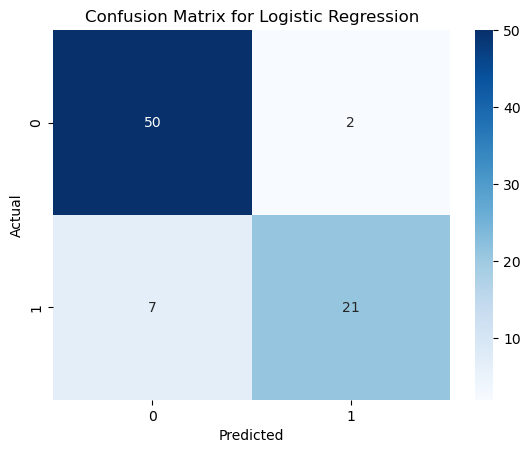

In [139]:
# Plotting the confusion matrix
# plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()